# 📚 Deeper Analysis  
**Author**: Tijana

## 🎯 Goal
In this analysis, we will turn raw data into insights that help teams understand what's really happening in sales.

We will explore the following questions:

- Sales Patterns: Which Products Have the Most Sales? Are there unexpected hits or lagging products?
- Performance by category: Are all categories equally successful or do some segments stand out?
- Success Factors: What characteristics (eg, price, ratings, inventory) have the greatest impact on how much a product sells?

Visualizations will help us present clear, data-driven insights suitable for decision-making.
Through graphs that clearly illustrate the distribution of sales (histograms, box plots);
correlation analyzes that reveal deeper connections in the data (eg heatmap);
and scatter plots that reveal how key factors affect sales.


## ✨ Step 1: Import required libraries
We are going to use Pandas to load the data, and Seaborn, Matplotlib and Plotly to create the charts.

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 📂 Step 2: Load the dataset
We will use the dataset containing information about online store data:

product_name, category,price, quantity_in_stock, quantity_sold, brand,rating, num_of_ratings, date_added, color, revenue.

In [111]:
df = pd.read_csv("online_store_data.csv", encoding="latin1")

## 👀Step 3: Show some sample
Show first 5 rows.

In [112]:
df.head()

,product_name,category,price,quantity_in_stock,quantity_sold,brand,rating,num_of_ratings,date_added,color,revenue
0,"iPad mini (2021) (64GB, Blue)",Tablets,499.00,266.0,185.0,Apple,8.75,151.0,02/02/2022,blue,92315.00
1,K55 RGB (Red),Keyboards,49.99,0.0,561.0,Corsair,8.50,455.0,8/14/2022,red,28044.39
2,Fenix 7 (Purple),Watches,699.99,0.0,374.0,Garmin,9.20,305.0,4/20/2022,purple,261796.26
3,"Mate 40 (256GB, Orange)",Smartphones,899.00,182.0,615.0,Huawei,8.50,500.0,10/23/2024,orange,552885.00
4,Rival 600 (Red),Mice,79.99,35.0,698.0,SteelSeries,9.25,556.0,9/29/2020,red,55833.02


## 🧐 Step 4: Basic rewiev
Basic information about the columns, summary statistics.

In [113]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       3078 non-null   object 
 1   category           3078 non-null   object 
 2   price              3076 non-null   float64
 3   quantity_in_stock  3034 non-null   float64
 4   quantity_sold      3077 non-null   float64
 5   brand              3078 non-null   object 
 6   rating             2938 non-null   float64
 7   num_of_ratings     3069 non-null   float64
 8   date_added         3078 non-null   object 
 9   color              3078 non-null   object 
 10  revenue            3075 non-null   float64
dtypes: float64(6), object(5)
memory usage: 264.6+ KB


product_name           0
category               0
price                  2
quantity_in_stock     44
quantity_sold          1
brand                  0
rating               140
num_of_ratings         9
date_added             0
color                  0
revenue                3
dtype: int64

## 📅 Step 5: Distribution of the sold units 
We will show how products are distributed by number of sold units.

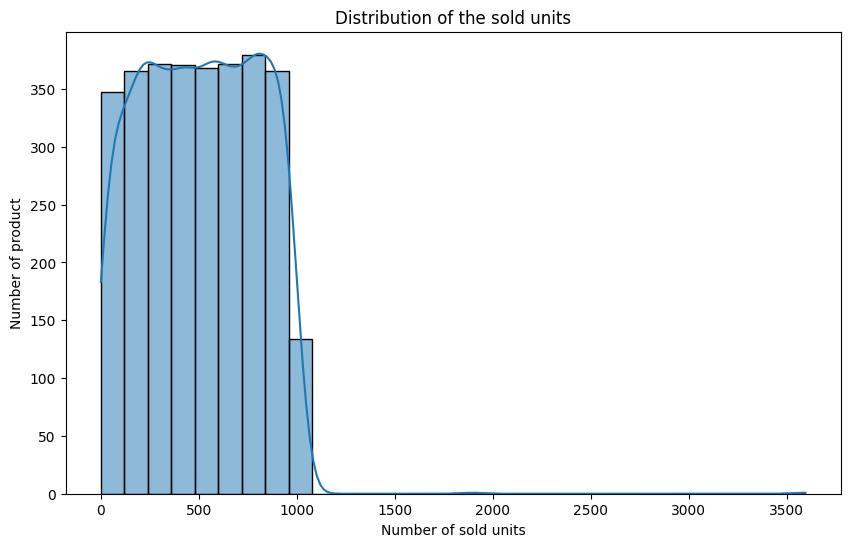

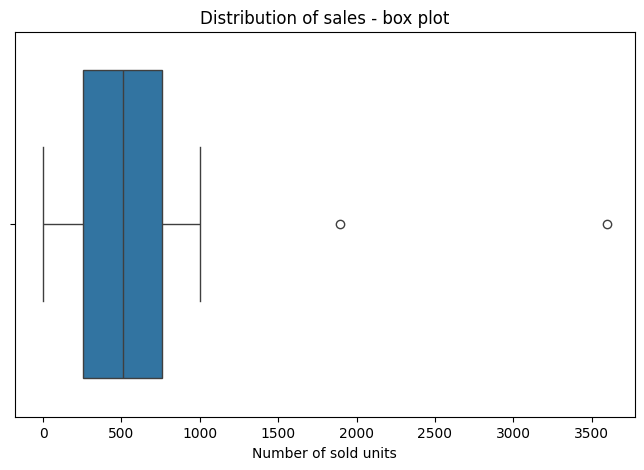

In [114]:
plt.figure(figsize=(10,6))
sns.histplot(df['quantity_sold'], bins=30, kde=True)
plt.title("Distribution of the sold units")
plt.xlabel("Number of sold units")
plt.ylabel("Number of product")
plt.show()

# Box plot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['quantity_sold'])
plt.title("Distribution of sales - box plot")
plt.xlabel("Number of sold units")
plt.show()


## 📝Step 6: Comparing categories
We will show how sales differ between product categories.

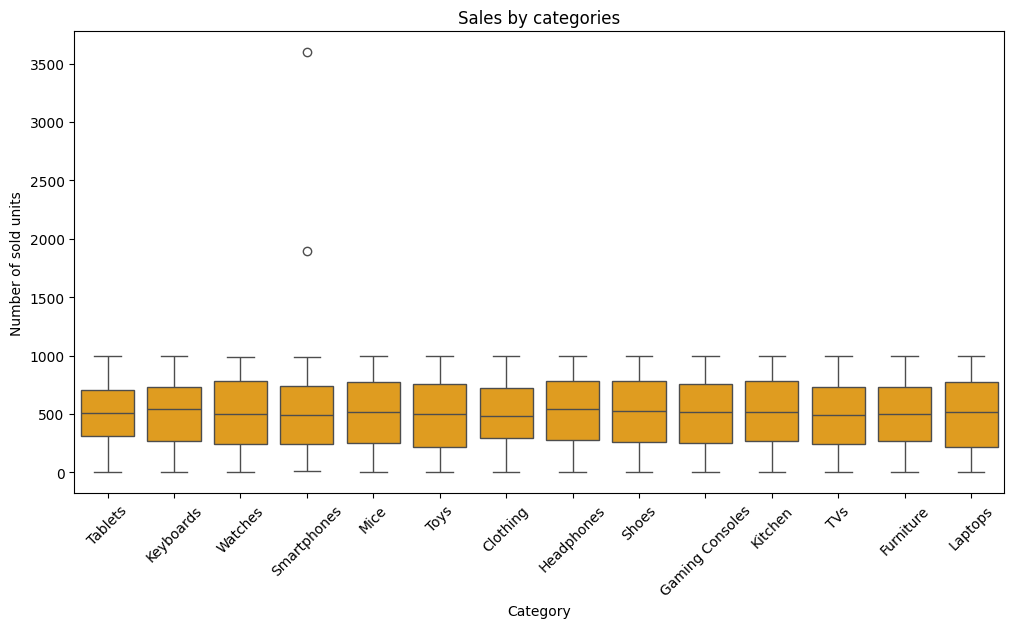

In [115]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='category', y='quantity_sold', color='orange')
plt.title("Sales by categories")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Number of sold units")
plt.show()

## 🔎Step 7: Correlation analysis
We will analyze how numerical characteristics relate to sales (price, rating, inventory, revenue).


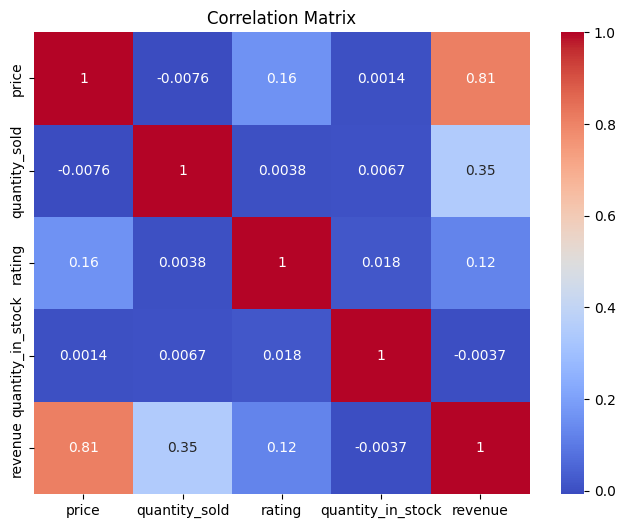

In [116]:
numeric_cols = ['price', 'quantity_sold', 'rating', 'quantity_in_stock', 'revenue']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 👓Step 8: Analysis of key success factors
For characteristics that most influence sales (price, user ratings), we will display scatter plots.

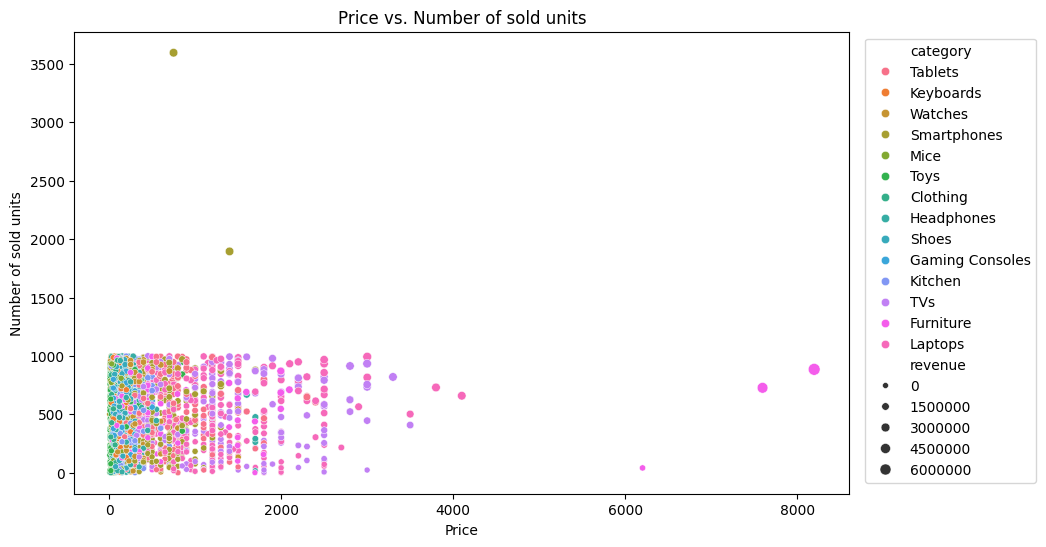

In [117]:
# Price vs units_sold
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='quantity_sold', hue='category', size='revenue', data=df)
plt.title("Price vs. Number of sold units")
plt.xlabel("Price")
plt.ylabel("Number of sold units")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

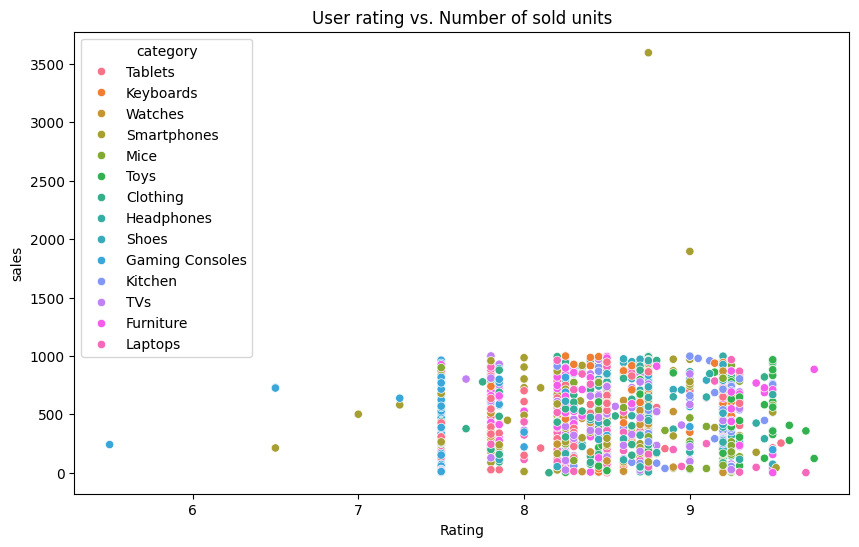

In [118]:
# Rating vs sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='rating', y='quantity_sold', hue='category', data=df)
plt.title("User rating vs. Number of sold units")
plt.xlabel("Rating")
plt.ylabel("sales")
plt.show()

## 🌐APPENDIX 1: Interactive scatter plot with Plotly
This is an interactive version (Plotly) that allows the team to explore independently.

In [119]:
df_clean = df.dropna(subset=["num_of_ratings", "price", "quantity_sold"])
fig = px.scatter(
    df_clean,
    x="price",
    y="quantity_sold",
    color="category",
    size="num_of_ratings",
    hover_data=["product_name", "brand", "rating"],
    title="Interactive chart: Price vs. Number of sold units"
)
fig.show()

## 🌐APPENDIX 2: Annotations on graphs (top 3 best selling products)
We add text labels for the most interesting products on the scatter plot.


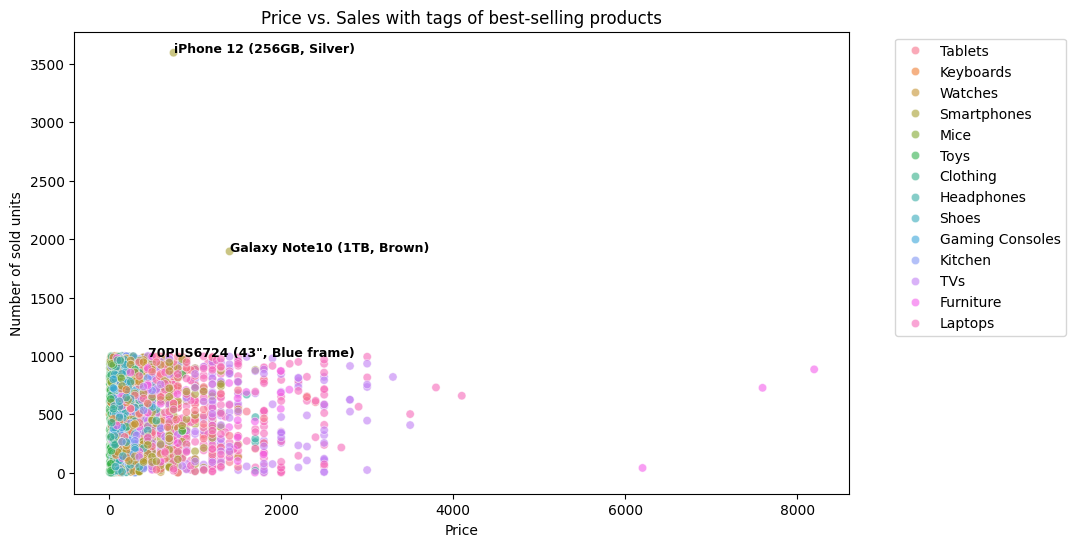

In [120]:
top_products = df.sort_values("quantity_sold", ascending=False).head(3)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="quantity_sold", data=df, hue="category", alpha=0.6)

for i, row in top_products.iterrows():
    plt.text(row["price"], row["quantity_sold"], row["product_name"], fontsize=9, weight='bold')

plt.title("Price vs. Sales with tags of best-selling products")
plt.xlabel("Price")
plt.ylabel("Number of sold units")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 🌐APPENDIX 3: Another useful chart - Top 10 products by sales
If you look only this graph, you will instantly know what is the most wanted products.

C:\Users\Private\AppData\Local\Temp\ipykernel_200\64225227.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




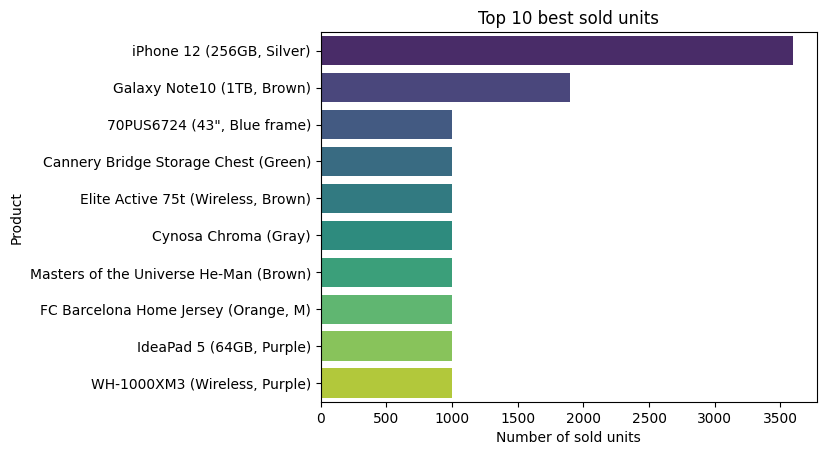

In [121]:
top_10 = df.sort_values("quantity_sold", ascending=False).head(10)

sns.barplot(data=top_10, y="product_name", x="quantity_sold", palette="viridis")
plt.title("Top 10 best sold units")
plt.xlabel("Number of sold units")
plt.ylabel("Product")
plt.show()

## 📌Conclusion

- 📈 **Key success factors**: Products with a higher rating and more reviews have more sales. Price is negatively related to sales – a lower price encourages sales.
- 🛍️ **Most successful categories**: Categories like "Tablets" and "Mice" show high sales values, while categories like "Smartwatches" have lower sales.
- 🚨 **Extremes and Anomalies**: There are more products with minimum sales - the procurement team could revise their presence in the offer.
- 🎯 **Recommendations**:
  - Focus marketing on highly rated products.
  - Investigate why some highly rated products have poor sales.
  - Track inventory of fast-selling products and increase availability.